<a href="https://colab.research.google.com/github/Kondwani7/Wine_quality_predicition/blob/main/Wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/practice datasets/winequality-red.csv')

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.shape

(1599, 12)

In [ ]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#remapping the quality scale
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

In [ ]:
data.loc[:, "quality"] = data.quality.map(quality_mapping)

In [ ]:
data.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,2
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,2
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,4
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,4
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,2


In [ ]:
#training validation split
#first shuffle the dataset
data = data.sample(frac=1).reset_index(drop=True)
#1600, 1000 for train, 599 for validation
data_train = data.head(1000)
data_test = data.tail(599)

In [ ]:
#sample decision tree for training
from sklearn import tree
from sklearn import metrics
#decision tree
clf = tree.DecisionTreeClassifier(max_depth=3)
cols  = [
      'fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar',	'chlorides',	'free sulfur dioxide',
      'total sulfur dioxide'	,'density',	'pH'	,'sulphates',	'alcohol'
]

clf.fit(data_train[cols], data_train.quality)

DecisionTreeClassifier(max_depth=3)

In [ ]:
#test accuracy
#generate predictions on the training set
train_preds = clf.predict(data_train[cols])  
#generate predictions on the test set  
test_preds = clf.predict(data_test[cols])
#calculate the accuracy of predictions on  
#training data set 
train_acc = metrics.mean_squared_error(data_train.quality, train_preds) 
#calculate the accuracy of predictions on  
#test data settes 
test_acc = metrics.mean_squared_error(data_test.quality, test_preds)


In [ ]:
train_acc

0.0

In [ ]:
test_acc

0.6928213689482471

In [ ]:
#better scaled variant of the solution
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

train_acc = [.5]
test_acc = [.5]

for depth in range(1, 25):
  clf = tree.DecisionTreeClassifier(max_depth=depth)

  cols  = [
      'fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar',	'chlorides',	'free sulfur dioxide',
      'total sulfur dioxide'	,'density',	'pH'	,'sulphates',	'alcohol'
  ]

  clf.fit(data_train[cols],data_train.quality)
  #get predictions
  train_preds = clf.predict(data_train[cols])  
  test_preds = clf.predict(data_test[cols])
  #track accuracy
  train_accuracy = metrics.accuracy_score(data_train.quality, train_preds) 
  test_accuracy = metrics.accuracy_score(data_test.quality, test_preds)
  #append accuracies to the initial values
  train_acc.append(train_accuracy)
  test_acc.append(test_accuracy)




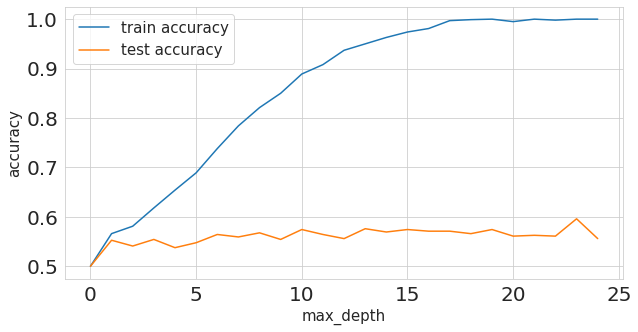

In [ ]:
# this demonstrates that the model clearly overfits
plt.figure(figsize=(10, 5))  
sns.set_style("whitegrid")  
plt.plot(train_acc, label="train accuracy")  
plt.plot(test_acc, label="test accuracy")  
plt.legend(loc="upper left", prop={'size': 15})  
plt.xticks(range(0, 26, 5))  
plt.xlabel("max_depth", size=15)  
plt.ylabel("accuracy", size=15)  
plt.show() 

Text(0, 0.5, 'count')

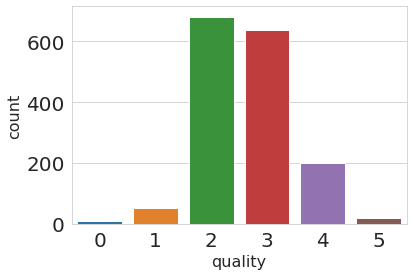

In [ ]:
#cross validation
#distribution of the target quality table
b = sns.countplot(x='quality', data=data)
b.set_xlabel('quality', fontsize=16)
b.set_ylabel("count", fontsize=16)


In [ ]:
#the dataset's target value doesn't have equal distribution, so we will stratified k-fold and xgboost
cols  = [
      'fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar',	'chlorides',	'free sulfur dioxide',
      'total sulfur dioxide'	,'density',	'pH'	,'sulphates',	'alcohol'
  ]
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import mean_squared_error
X, y  = data_train[cols], data_train.quality

kf = KFold(n_splits =5,shuffle=True,random_state=160)
feats = pd.DataFrame({'features': X.columns}) 
gbm_predictions = []
cv_score_ = 0
oof_preds = np.zeros((data_train.shape[0],))


for i,(tr_index,test_index) in enumerate(kf.split(X,y)):
  
  print()
  print(f'######### FOLD {i+1} / {kf.n_splits} ')
  
  X_train,y_train = X.iloc[tr_index,:],y[tr_index]
  X_test,y_test = X.iloc[test_index,:],y[test_index]
  
  gbm = xgb.XGBRegressor(eval_metric = 'rmse',n_estimators = 2000,learning_rate = 0.01,seed=162,random_state = 162,colsample_bytree=0.65)

  gbm.fit(X_train,y_train,eval_set = [(X_test, y_test)],early_stopping_rounds= 200,verbose=100)
  
  cv_score_ += mean_squared_error(y_test, gbm.predict(X_test), squared=False) / kf.n_splits
  oof_preds[test_index] = gbm.predict(X_test)
  
  preds = gbm.predict(data_test[cols])
  gbm_predictions.append(preds)

  feats[f'Fold {i}'] = gbm.feature_importances_

feats['Importances'] = feats.mean(axis=1)
print( ' CV RMSE : ',cv_score_)
preds_xgb = np.average(gbm_predictions, axis=0)
print(preds_xgb.shape)



######### FOLD 1 / 5 
[10:49:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2.20457
Will train until validation_0-rmse hasn't improved in 200 rounds.
[100]	validation_0-rmse:1.00386
[200]	validation_0-rmse:0.690057
[300]	validation_0-rmse:0.628708
[400]	validation_0-rmse:0.616628
[500]	validation_0-rmse:0.615039
[600]	validation_0-rmse:0.615115
[700]	validation_0-rmse:0.614776
[800]	validation_0-rmse:0.613107
[900]	validation_0-rmse:0.613757
[1000]	validation_0-rmse:0.613344
Stopping. Best iteration:
[834]	validation_0-rmse:0.612589


######### FOLD 2 / 5 
[10:49:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2.23298
Will train until validation_0-rmse hasn't improved in 200 rounds.
[100]	validation_0-rmse:0.999297
[200]	validation_0-rmse:0.675552
[300]	validation_0-rmse:0.614718
[400]	validation_0-

In [ ]:
#model performance improvded from rmse 0.69 to 0.60339